# **Laboratorio 10: convexidad**

In [ ]:
#@title Librerías
import math
import numpy as np
import sympy as sym
import itertools
from scipy.optimize import minimize
from scipy.optimize import linprog
import time
import pandas as pd
from IPython.display import display, HTML
from tabulate import tabulate
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#@title Función graficadora
def graficar(x1,x2,titulo):

  z = lambda x,y: 3*(1-x)**(2)*np.exp(-(x**2)-(y+1)**2) -10*((x/5)-x**(3)-y**(5))*np.exp(-x**(2)-y**(2))-(1/3)*np.exp(-(x+1)**(2)-y**2)
  z1 = z(x1[0], x1[1])
  z2 = z(x2[0], x2[1])
  t = np.arange(0,1,0.01)

  # Línea
  L = []
  for i in t:
    l = i*z1 + (1-i)*z2
    L.append(l)

  # Función 2d
  Q = []

  for j in t:
    q = j*x1 + (1-j)*x2
    Q.append(q)
  pos = np.arange(0,100,1)

  Z = []
  for k in pos:
    r = Q[k]
    x, y = r[0],r[1]
    zeta = z(x, y)
    Z.append(zeta)

  # Graficar
  plt.plot(t,L)
  plt.plot(t,Z)
  plt.xlabel('t')
  plt.ylabel('f(x)')
  plt.title(titulo)
  plt.show()

## Ejemplo

Ejemplo de como utilizar la función implementada en python.

Se busca aplicar la prueba de convexidad de la función $\gamma(x,y)$ en el intervalo que va desde el punto [0,0] hasta el punto [3,3].

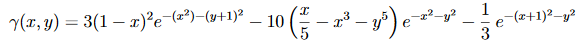

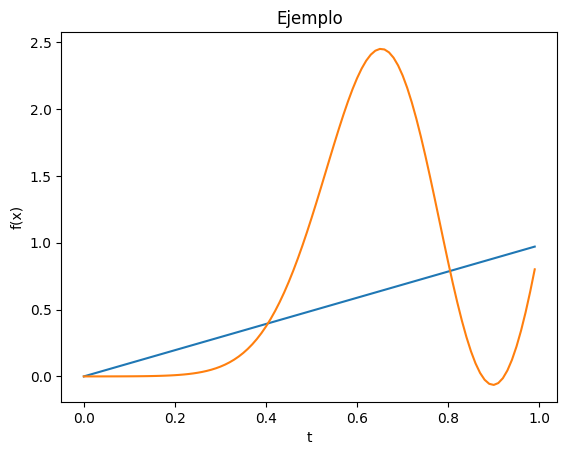

In [ ]:
graficar(np.array([0,0]), np.array([3,3]), titulo="Ejemplo")

# Punto 1

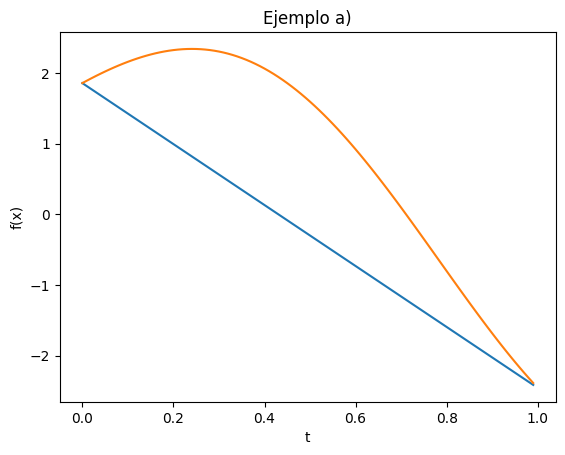

In [ ]:
graficar(np.array([1/10,-11/10]), np.array([-1,-1]), titulo="Ejemplo a)")

Como se observa en la figura, podemos afirmar una concavidad sobre esta región de la función, y es debido a que trazando una recta con los puntos asignados, esta está por debajo de la función.

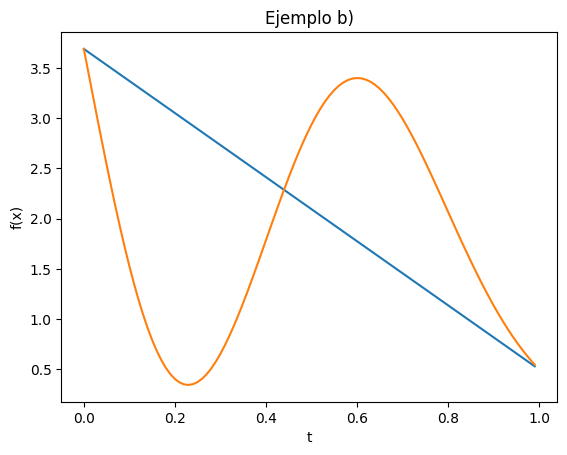

In [ ]:
graficar(np.array([2,-1]), np.array([0,1]), titulo="Ejemplo b)")

En este ejemplo, se obervan cambios en el comportamiento de la función. Ya que para el rango entre $x=$[0 0.4] la función es convexa porque la recta está por encima de la función. Por último, la función es cóncava en el rango de $x=$[0.4 1], debido a que la recta está por debajo de la función $f(x)$


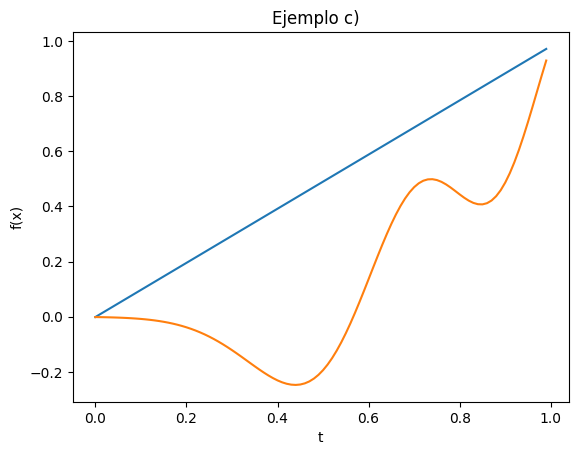

In [ ]:
graficar(np.array([0,0]), np.array([13/5,-12/5]), titulo="Ejemplo c)  ")

Observando la figura, podemos concluir que la función alrededor de los puntos de aproximación y trazando una recta, es convexa debido a que esta está por encima de la función $f(x)$

d) Acerca de la concavidad/convexidad de la función $f(x)$, no es posible afirmar de manera global/local sobre este aspecto. Esto es debido a que probando con los puntos anteriores, la función de manera local entre puntos "cercanos" varía su convexidad y su concavidad. Podemos afirmar esta caraterística si nos acercamos aún más dando una región más pequeña en el rango de $x$ y $y$.

#Punto 2

A continuación, se muestran las curvas de contorno de la función. Identificando el gradiente en los siguientes puntos: (0, 1.6), (0.2, −1.6), (1.3, 0), (0.3, 0.3) y (-1,1).

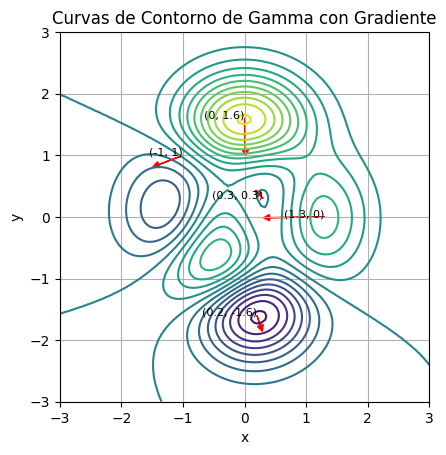

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definir la función gamma
def gamma(x, y):
    return 3*(1-x)**(2)*np.exp(-(x**2)-(y+1)**2) -10*((x/5)-x**(3)-y**(5))*np.exp(-x**(2)-y**(2))-(1/3)*np.exp(-(x+1)**(2)-y**2)

# Crear un rango de valores para x y y
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

# Crear una cuadrícula de valores para x y y
X, Y = np.meshgrid(x, y)

# Calcular los valores de gamma para cada punto en la cuadrícula
Z = gamma(X, Y)

# Graficar las curvas de contorno de gamma
plt.contour(X, Y, Z, levels=20)

# Calcular el gradiente de gamma en los puntos dados
points = [(0, 1.6), (0.2, -1.6), (1.3, 0), (0.3, 0.3), (-1, 1)]
for point in points:
    x, y = point
    gradient_x = 3*(-2*x)*(1-x)**(2)*np.exp(-(x**2)-(y+1)**2) -10*((1/5)-3*x**(2))*np.exp(-x**(2)-y**(2))+(2/3)*(x+1)*np.exp(-(x+1)**(2)-y**2)
    gradient_y = -6*(1-x)*np.exp(-(x**2)-(y+1)**2) +10*y**(4)*np.exp(-x**(2)-y**(2))+(2/3)*y*np.exp(-(x+1)**(2)-y**2)
    magnitude = math.hypot(gradient_x, gradient_y)  # Cálculo de la magnitud del gradiente
    plt.arrow(x, y, -gradient_x*0.1, -gradient_y*0.1, head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(x, y, f'({x}, {y})', fontsize=8, ha='right')

# Mostrar la gráfica
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de Contorno de Gamma con Gradiente')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Preguntas

Las preguntas a continuación, se responderan en el último parrafo de esta sección.

1. ¿Cómo se comporta el gradiente alrededor del punto (x, y) = (0, 1.6)? ¿Qué significa?

2. ¿Cómo se comporta el gradiente alrededor del punto (x, y) = (0.2, −1.6)? ¿Qué significa?

3. ¿Cómo se comporta el gradiente alrededor del punto (x, y) = (-1, 1)? ¿Qué significa?

En cada uno de los puntos se muestra tanto la dirección como la magnitud del gradiente. Para cada caso tanto la dirección como la magnitud del gradiente es diferente. Por ejemplo, para el punto (0, 1.6) el gradiente apunta en la dirección $y$ y la tasa de cambio en esa dirección es la mayor. En cambio para los otros puntos el gradiente tiene dirección en ambos ejes y una magnitud menor relativa a la del punto (0, 1.6). Con esto, podemos decir que la función tiene varios mínimos y máximos locales y nos encontraremos en cada uno de ellos de acuerdo con que punto nos encontremos en la función.

# Punto 3

Se diseñaron las funciones teniendo en cuenta que deben dar cero sobre la región de la elipse definida por $D=\{(x,y):\frac{x^2}{4}+\frac{y^2}{9}=25\}$.

Se definieron de la siguiente manera:

$$q_1(x,y)=-\frac{x^2}{4}-\frac{y^2}{9}+25$$
\
$$q_2(x,y)=\frac{x^2}{4}+\frac{y^2}{9}-25$$

Esto lo sabemos en vista de que conocemos la geometría de un paraboloide para tres dimensiones y sabemos que la función debe contener la sección cónica de la curva de nivel en $z=0$ y debemos orientarla con apertura hacia arriba o hacia abajo tal que satisfaga las condiciones dadas, que son las siguientes:

* $q_1 > 0 : \forall (x,y)\in D$
* $q_1 < 0 : \forall (x,y)\notin D$
* $q_2 < 0 : \forall (x,y)\in D$
* $q_2 > 0 : \forall (x,y)\notin D$

Así, para $q_1$ debe ser mayor que cero dentro de la región, por lo cual el paraboloide debe tener coeficientes negativos (es decir, apertura hacia abajo). En particular, debe tener desplazamiento 25 para que exactamente en $z=0$ la curva de nivel corresponda a la elipse $D$.

El razonamiento para $q_2$ es análogo, pero se usan coeficientes positivos para que la apertura sea hacia arriba y desplazamiento de -25 para que al cruzar por $z=0$ la curva de nivel sea exactamente $D$.

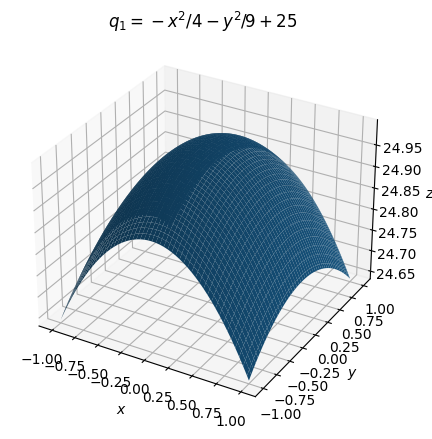

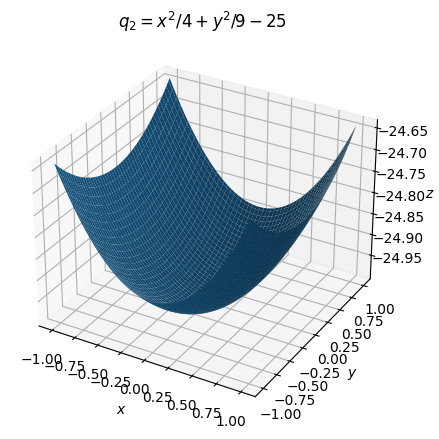

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la región [-1,1]x[-1x1] para graficar sobre el dominio
x = np.outer(np.linspace(-1,1,100), np.ones(100))
y = x.copy().T
q1 = -((x**2)/4)-((y**2)/9)+25
q2 = ((x**2)/4)+((y**2)/9)-25

# Tomado de StackOverflow para el uso de la función plot_surface
fig1 = plt.figure(figsize =(5, 5))
ax1 = plt.axes(projection ='3d')
ax1.plot_surface(x, y, q1)

# Procedimiento para plotear con Axis
ax1.set_title("$q_1 = -x^2/4-y^2/9+25$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_zlabel("$z$")
plt.show()

# Tomado de StackOverflow para el uso de la función plot_surface
fig2 = plt.figure(figsize =(5, 5))
ax2 = plt.axes(projection ='3d')
ax2.plot_surface(x, y, q2)

# Procedimiento para plotear con Axis
ax2.set_title("$q_2 = x^2/4+y^2/9-25$")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.set_zlabel("$z$")
plt.show()

Para realizar el análisis de convexidad y la clasificación correspondiente, se recurre a las Condiciones de Primer y Segundo Orden:

**Para la función $q_1(x,y)$:**
\
CNPO:
$$\nabla{q_1(x,y)}=\begin{bmatrix}-\frac{x}{2} & -\frac{2y}{9}\end{bmatrix}^T = \vec{0} ⟶ (x,y)=(0,0)$$
\
CSO:
$$\nabla^2{q_1(0,0)}=\begin{bmatrix}-\frac{1}{2} & 0\\ 0 & -\frac{2}{9}\end{bmatrix}$$
Como los valores propios de la hessiana evaluada en el punto crítico son $\lambda=\{-\frac{1}{2}, -\frac{2}{9}\} < 0$, la Hessiana es **Negativa Definida**.

En consecuencia, la función polinómica $q_1(x,y)$ es **Cóncava**.

\
**Para la función $q_2(x,y)$:**
\
CNPO:
$$\nabla{q_2(x,y)}=\begin{bmatrix}\frac{x}{2} & \frac{2y}{9}\end{bmatrix}^T = \vec{0} ⟶ (x,y)=(0,0)$$
\
CSO:
$$\nabla^2{q_2(0,0)}=\begin{bmatrix}\frac{1}{2} & 0\\ 0 & \frac{2}{9}\end{bmatrix}$$
Como los valores propios de la hessiana evaluada en el punto crítico son $\lambda=\{\frac{1}{2}, \frac{2}{9}\} > 0$, la Hessiana es **Positiva Definida**.

En consecuencia, la función polinómica $q_2(x,y)$ es **Convexa**.